# Model 1

In [87]:
# imports
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Data Visualization

In [88]:
# clean and normalize data
curr_dir = os.getcwd()
project_dir = os.path.dirname(os.path.dirname(curr_dir))
data_dir = "".join([project_dir, '\data\investigation_train_large_checked.csv'])
df = pd.read_csv(data_dir, encoding='ISO-8859-1')
# df.head()

english_names_dir = "".join([project_dir, '\data\data_description.csv'])
names_df = pd.read_csv(english_names_dir, encoding='ISO-8859-1')
name_mapping = dict(zip(names_df['Feature (nl)'], names_df['Feature (en)']))

# Rename the columns in the `df` DataFrame
df.rename(columns=name_mapping, inplace=True)

# Check the updated column names
df.head()

,address_number_personal_records_database_addresses,address_number_different_districts,address_number_mail_address,address_number_residential_address_manual,address_days_at_address,address_latest_part_rotterdam,address_latest_neighborhood_groot_ijsselmonde,address_latest_neighborhood_new_westen,address_latest_neighborhood_other,address_latest_neighborhood_olde_north,...,type_hist_ind,type_hist_care_sector,type_ind,type_indication_secret_data,type_other,type_transport_logistics_horticulture,type_care_cleaning_wellbeing,Ja,Nee,checked
0,1,1,0,0,23240,1,0,0,0,0,...,1,0,0,0,0,0,0,0.617698,0.382302,False
1,4,2,1,1,1971,1,0,0,1,0,...,1,0,1,0,1,0,0,0.602167,0.397833,False
2,6,4,2,1,7247,0,0,0,1,0,...,1,0,1,0,0,0,0,0.512377,0.487623,False
3,3,2,0,1,8060,1,0,0,1,0,...,1,0,0,0,0,0,0,0.717796,0.282204,True
4,3,2,0,0,18705,1,0,0,0,0,...,1,0,1,0,0,0,0,0.705484,0.294516,True


Average age: 49.0
Min age: 49.0
Max age: 67
person_age_at_investigation
0-9          0
10-19      184
20-29     4613
30-39    18336
40-49    39397
50-59    45156
60-69    22314
70-79        0
80-89        0
Name: count, dtype: int64


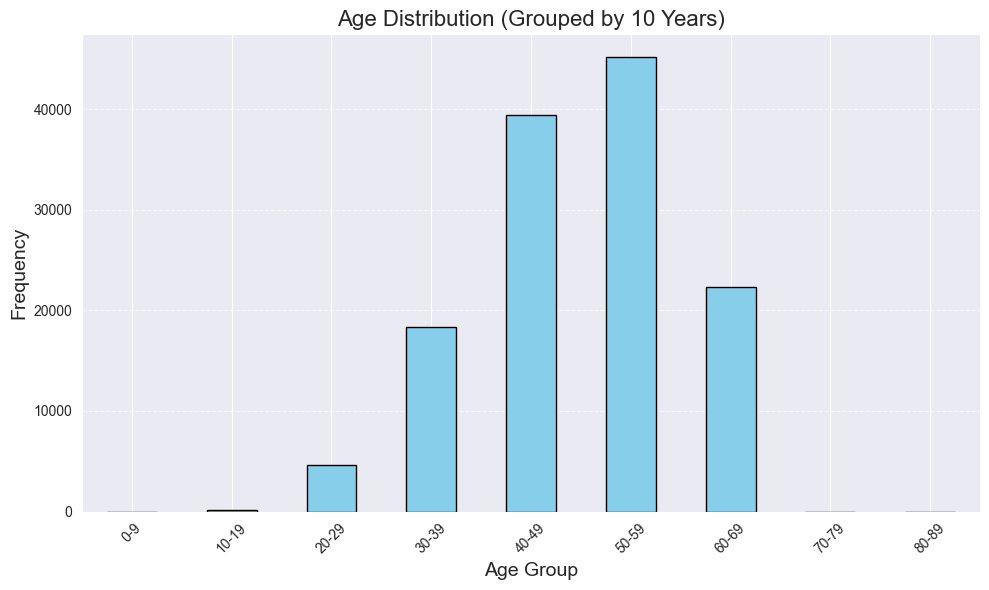

In [89]:
min = np.round(df['person_age_at_investigation'].mean())
max = np.round(df['person_age_at_investigation'].max())

print('Average age: ' + str(np.round(df['person_age_at_investigation'].mean())))
print('Min age: ' + str(min))
print('Max age: ' + str(max))

bins = range(0, 100, 10)  # Bins: 0-9, 10-19, ..., 100-109
labels = [f"{i}-{i+9}" for i in bins[:-1]]
age_groups = pd.cut(df['person_age_at_investigation'], bins=bins, labels=labels, right=False)

# Count frequencies in each age group
age_distribution = age_groups.value_counts(sort=False)
print(age_distribution)

# Plot the bar chart
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the chart
plt.title('Age Distribution (Grouped by 10 Years)', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

[63015, 66985]


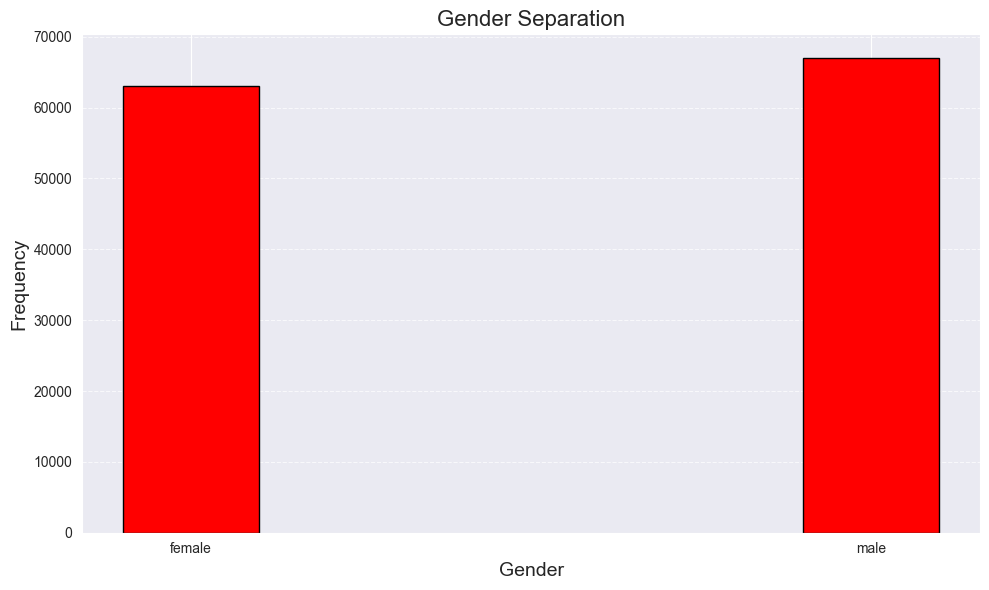

In [90]:
# Count frequencies in each age group
female_count = df['person_gender_woman'].sum()
gender_distribution = [female_count, df['person_gender_woman'].count()-female_count]
print(gender_distribution)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(['female', 'male'], gender_distribution, color='red', edgecolor='black', width=0.2)

# Customize the chart
plt.title('Gender Separation', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\chena\AppData\Local\Temp\ipykernel_32232\1565039860.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10['Relative importance'] = top_10['Relative importance']/top_10['Relative importance'].sum()


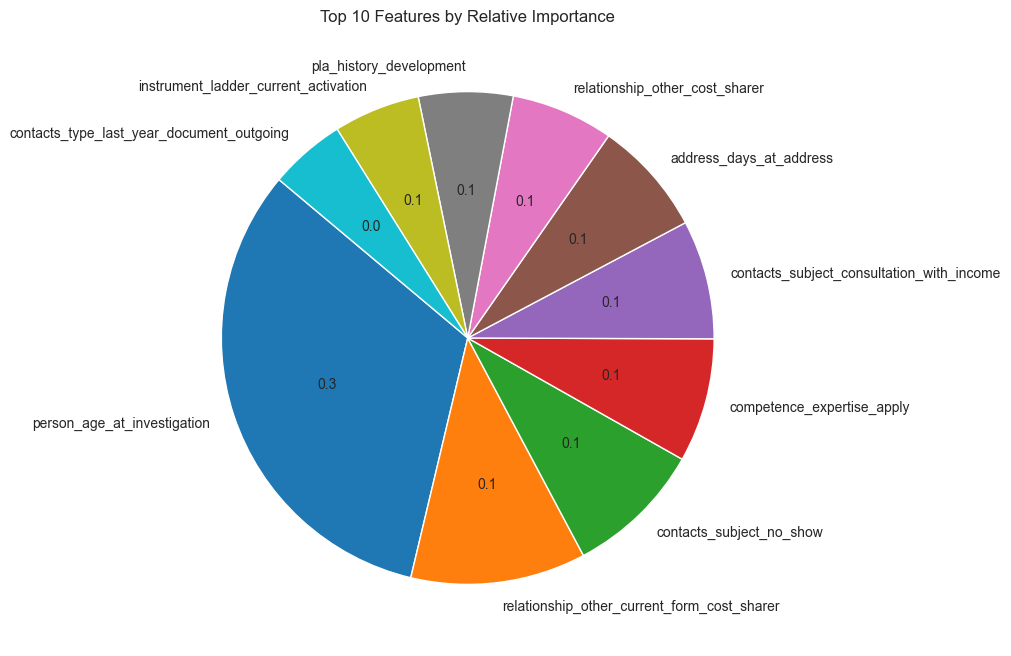

In [97]:
data = names_df.sort_values(by="Relative importance", ascending=False)
top_10 = data.head(10)

def raw_values(pct, all_vals):
    absolute = int(round(pct/100.*sum(all_vals), 2))
    return f'{absolute}'

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

top_10['Relative importance'] = top_10['Relative importance']/top_10['Relative importance'].sum()
top_10

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_10["Relative importance"], 
    labels=top_10["Feature (en)"], 
    autopct=lambda pct: f'{pct * sum(top_10["Relative importance"]) / 100:.1f}',
    startangle=140
)
plt.title("Top 10 Features by Relative Importance")
plt.show()

Index(['Nee', 'Ja', 'pla_history_development',
       'pla_hist_pla_category_objective_16',
       'instrument_ladder_current_activation',
       'relationship_other_current_form_cost_sharer',
       'person_age_at_investigation', 'instrument_ladder_history_activation',
       'relationship_other_cost_sharer', 'contacts_subject_no_show',
       'personal_qualities_days_since_language_requirement',
       'pla_current_pla_category_objective_16',
       'appointment_result_filled_unique',
       'contacts_subject_consultation_with_income',
       'appointment_signal_for_employee',
       'contacts_type_last_year_document_outgoing',
       'exemption_days_hist_due to_your_medical_conditions',
       'participation_act_current_projects_unique', 'exemption_days_hist_mean',
       'instrument_reason_termination_history_successful',
       'competence_expertise_apply',
       'relationship_other_history_shape_cost_sharer',
       'appointment_effort_period', 'contacts_subject_document_type_ag

C:\Users\chena\AppData\Local\Temp\ipykernel_32232\1281686730.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


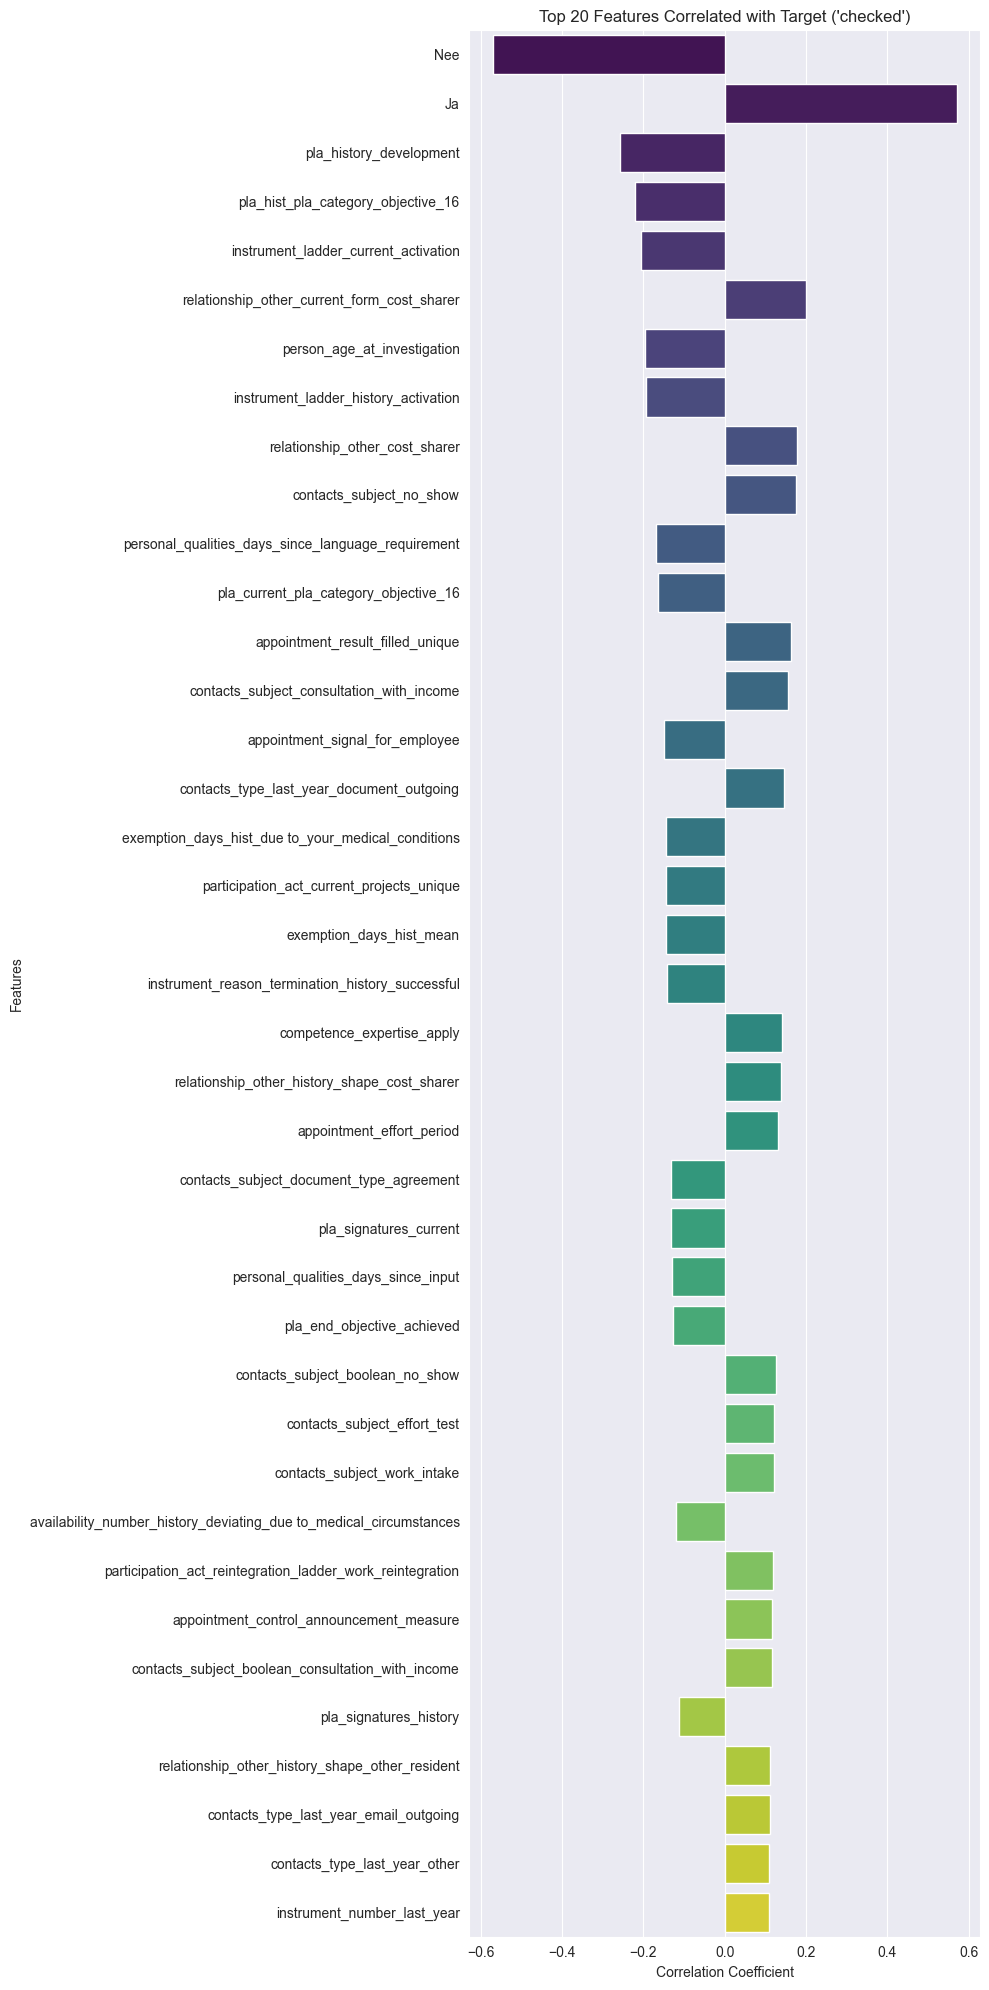

In [86]:
# Define the target column
target_column = 'checked'

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame for easier analysis
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Recombine the scaled features with the target column
df_scaled = pd.concat([X_scaled_df, y], axis=1)

# Calculate the correlation matrix on the scaled DataFrame
correlation_matrix = df_scaled.corr()

# Get correlations with the target variable
correlation_with_target = correlation_matrix[target_column].drop(target_column)

# Select the 20 most important features (absolute correlation values)
top_features = correlation_with_target.abs().sort_values(ascending=False).head(50-11)
top_features_names = top_features.index
print(top_features_names)

# Extract correlations for the top features
top_features_correlation = correlation_with_target[top_features_names]

# Plot the correlations
plt.figure(figsize=(10, 20))
sns.barplot(
    x=top_features_correlation.values,
    y=top_features_correlation.index,
    palette="viridis"
)
plt.title("Top 20 Features Correlated with Target ('checked')")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()